# Compare QTLs with and without cell populations


In [1]:
setwd("/frazer01/projects/GTEx_v7/analysis/eqtls_deconvolution")

In [2]:
invisible(suppressWarnings(file.link("/frazer01/home//matteo/notebooks/eqtls_deconvolution_gtex//analyze_qtl_results.ipynb", "analysis/analyze_qtl_results.ipynb")))

source("analysis/cardiac_qtls_packages.R"      )
source("analysis/cardiac_qtls_input_files.R"   )
source("analysis/cardiac_qtls_functions.R"     )
source("analysis/cardiac_qtls_input_data.R"    )
source("analysis/cardiac_qtls_load_metadata.R" )


Loading packages...
Loading input files...
Loading functions...
Loading input data...
Loading metadata...


liver_original liver_cells liver
1369 0 6471


$ttest_beta

	Paired t-test

data:  abs(qtls$beta2) and abs(qtls$beta1)
t = -81.185, df = 19620, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3240565 -0.3087777
sample estimates:
mean of the differences 
             -0.3164171 


$ttest_se

	Paired t-test

data:  qtls$se2 and qtls$se1
t = -64.199, df = 19620, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.05043965 -0.04745089
sample estimates:
mean of the differences 
            -0.04894527 



liver_original liver2_cells liver
1369 0 8808


$ttest_beta

	Paired t-test

data:  abs(qtls$beta2) and abs(qtls$beta1)
t = -83.338, df = 19620, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3479117 -0.3319222
sample estimates:
mean of the differences 
             -0.3399169 


$ttest_se

	Paired t-test

data:  qtls$se2 and qtls$se1
t = -66.575, df = 19620, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.05575160 -0.05256263
sample estimates:
mean of the differences 
            -0.05415711 



liver_cells liver2_cells liver
7419 421 2758


$ttest_beta

	Paired t-test

data:  abs(qtls$beta2) and abs(qtls$beta1)
t = -7.2832, df = 19620, p-value = 3.383e-13
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.02982421 -0.01717548
sample estimates:
mean of the differences 
            -0.02349984 


$ttest_se

	Paired t-test

data:  qtls$se2 and qtls$se1
t = -7.7005, df = 19620, p-value = 1.419e-14
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.006538463 -0.003885223
sample estimates:
mean of the differences 
           -0.005211843 



skin_original skin_cells skin
9232 0 4942


$ttest_beta

	Paired t-test

data:  abs(qtls$beta2) and abs(qtls$beta1)
t = -72.548, df = 24028, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.09902776 -0.09381758
sample estimates:
mean of the differences 
            -0.09642267 


$ttest_se

	Paired t-test

data:  qtls$se2 and qtls$se1
t = -66.77, df = 24028, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.01722079 -0.01623858
sample estimates:
mean of the differences 
            -0.01672969 



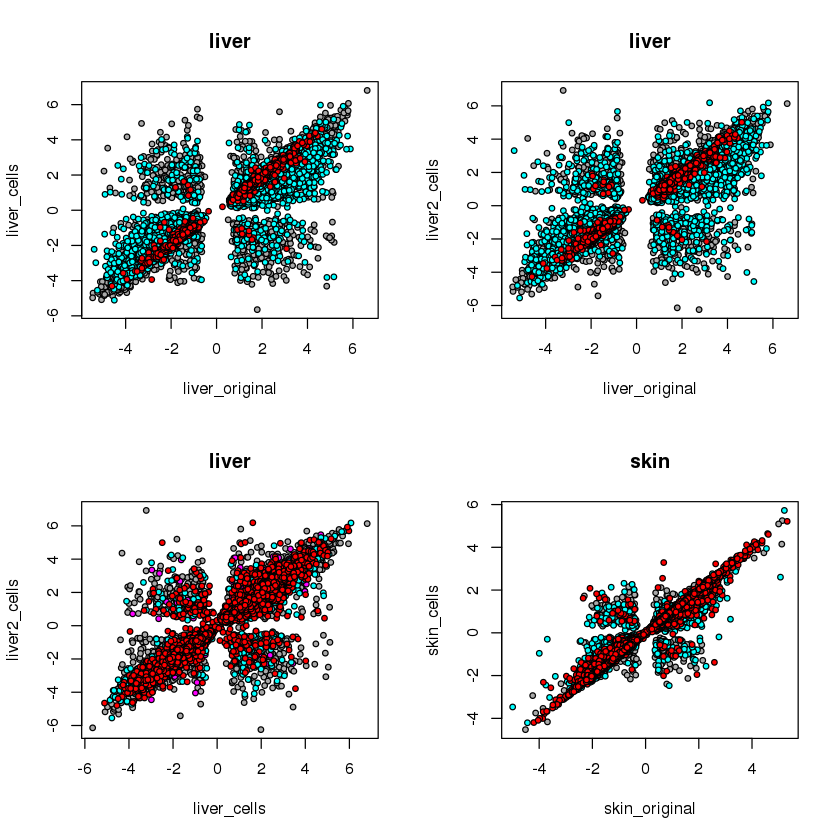

In [7]:
compare_qtls = function(tissue1, tissue2, tissue)
{
    message(paste(tissue1, tissue2, tissue))
    qtls1 = read.table(paste("qtls/", tissue1, "/analysis/egenes.", tissue1, ".txt", sep = ""), header = TRUE)
    qtls2 = read.table(paste("qtls/", tissue2, "/analysis/egenes.", tissue2, ".txt", sep = ""), header = TRUE)
    qtls  = merge(qtls1[,c("gene_id", "egene", "beta", "se", "bonferroni")], qtls2[,c("gene_id", "egene", "beta", "se", "bonferroni")], by = "gene_id", suffixes = 1:2)
    qtls$color = "#aaaaaa"
    qtls[qtls$egene1 == TRUE  & qtls$egene2 == TRUE , "color"] = "#ff0000"
    qtls[qtls$egene1 == TRUE  & qtls$egene2 == FALSE, "color"] = "#ff00ff"
    qtls[qtls$egene1 == FALSE & qtls$egene2 == TRUE , "color"] = "#00ffff"
    qtls = qtls[order(qtls$egene2, qtls$egene1),]
    
    plot(qtls$beta1, qtls$beta2, bg = qtls$color, pch = 21, cex = 0.75, xlab = tissue1, ylab = tissue2, main = tissue)
    
    message(paste(nrow(qtls[qtls$egene1 == TRUE  & qtls$egene2 == TRUE ,]),
                  nrow(qtls[qtls$egene1 == TRUE  & qtls$egene2 == FALSE,]),
                  nrow(qtls[qtls$egene1 == FALSE & qtls$egene2 == TRUE ,])
                 ))
    
    
    return(list(#qtls1      = qtls1, 
                #qtls2      = qtls2,
                ttest_beta = t.test(abs(qtls$beta2), abs(qtls$beta1), paired = TRUE),
                ttest_se   = t.test(qtls$se2  , qtls$se1  , paired = TRUE)))
}

par(mfrow = c(2,2))

compare_qtls("liver_original", "liver_cells" , "liver")
compare_qtls("liver_original", "liver2_cells", "liver")
compare_qtls("liver_cells"   , "liver2_cells", "liver")
compare_qtls("skin_original" , "skin_cells"  , "skin" )



In [ ]:
t.test(abs(qtls$beta2), abs(qtls$beta1), paired = TRUE)
t.test(qtls$se2  , qtls$se1  , paired = TRUE)

In [ ]:
table(qtls$color)

In [ ]:
plot(       qtls$beta1       ,        qtls$beta2       , col = qtls$color, pch = 16)
plot(-log10(qtls$bonferroni1), -log10(qtls$bonferroni2), col = qtls$color, pch = 16)


In [ ]:
str(qtls1)
str(qtls2)
